<a href="https://colab.research.google.com/github/ujwalnk/MachineLearning101/blob/main/examples/Neural_Network_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- NN requires more data
- Called deep learning as they vbecome deepter as the number of hidden layers increase, like a funnel

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D,  MaxPool2D, Flatten
import tensorflow as tf
import pandas as pd

For unzipping Kaggle datasets

In [ ]:
import zipfile

def unzip_file(filename):
  zip_ref = zipfile.ZipFile(filename, 'r')
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_file("archive.zip")

# Data Preprocessing

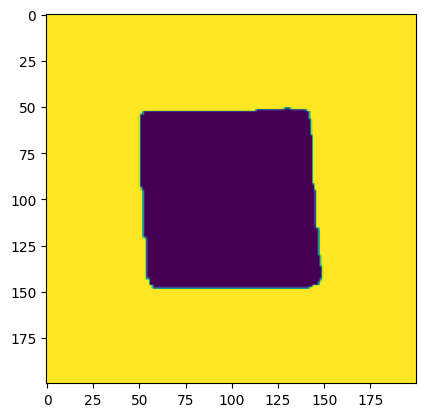

In [ ]:
import matplotlib.pyplot as pplt
pplt.imshow(pplt.imread("./shapes/square/101.png"))
# Print to check

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

> Incase of lack to image data use ImageDataGenerator to generate images, using previous images
- Shering the images
- Moving around and adding extra blank pixels
- Rotating the images
- Brightness etc

## Data Augmentation

Runs along with the new model, generating data on the fly, cant be visualized or seen on the explorer

In [ ]:
# 1/255 for rescale as its better to get everything into 0 to 1 range - RGB Value
# Smaller number 
train_data_gen = idg(rescale=1/255, rotation_range=37, width_shift_range=0.10, height_shift_range=0.21, validation_split=0.2)

# Reshape every file to target size, better to keep it at 256 or close to 300
# Use it for training and not for validation
train_data = train_data_gen.flow_from_directory("./shapes", target_size=(256, 256), subset="training") 
validation_data = train_data_gen.flow_from_directory("./shapes", target_size=(256, 256), subset="validation") 

Found 11968 images belonging to 4 classes.
Found 2990 images belonging to 4 classes.


Remove some samples from the train set for testing

In [ ]:
!mv shapes/triangle/13.png ./test_data
!mv shapes/triangle/130.png ./test_data
!mv shapes/triangle/1300.png ./test_data

# Modelling

First try - low accuracy

In [ ]:
model_1 = tf.keras.Sequential([
    Flatten(),
    Dense(10, activation="relu"),
    Dense(10, activation="relu"),
    Dense(4, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),  # Loss function that we want
                optimizer=tf.keras.optimizers.Adam(),  # Similar to Gradient Descent
                metrics=["accuracy"]) # Metrics to measure

history_1 = model_1.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
374/374 [==============================] - 243s 644ms/step - loss: 3.0598 - accuracy: 0.2516 - val_loss: 1.3864 - val_accuracy: 0.2485
Epoch 2/5
374/374 [==============================] - 237s 634ms/step - loss: 1.3864 - accuracy: 0.2489 - val_loss: 1.3863 - val_accuracy: 0.2515
Epoch 3/5
374/374 [==============================] - 239s 639ms/step - loss: 1.3864 - accuracy: 0.2515 - val_loss: 1.3863 - val_accuracy: 0.2515
Epoch 4/5
374/374 [==============================] - 240s 642ms/step - loss: 1.3863 - accuracy: 0.2495 - val_loss: 1.3863 - val_accuracy: 0.2515
Epoch 5/5
374/374 [==============================] - 240s 641ms/step - loss: 1.3864 - accuracy: 0.2506 - val_loss: 1.3863 - val_accuracy: 0.2515


In [ ]:
pd.DataFrame(history_1.history).to_csv("model_1_history")

Plotting the loss metrics curve

<Axes: >

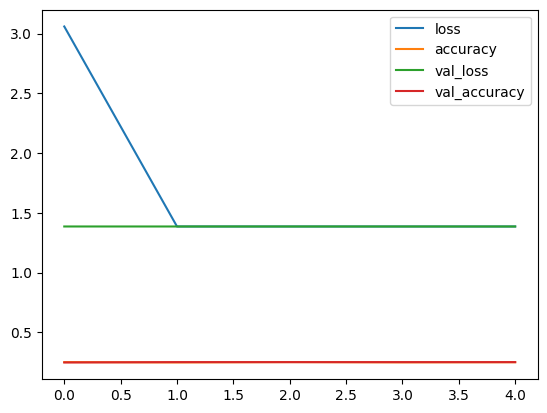

In [ ]:
pd.DataFrame(history_1.history).plot()

Trial 2 - More layers, higher accuracy

In [ ]:
model2 = tf.keras.Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="relu"),
    Dense(4, activation="softmax")
])

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history2 = model2.fit(train_data,
                      epochs=5,
                      validation_data=validation_data)

Epoch 1/5
374/374 [==============================] - 279s 730ms/step - loss: 0.5839 - accuracy: 0.7314 - val_loss: 0.1579 - val_accuracy: 0.9458
Epoch 2/5
374/374 [==============================] - 245s 655ms/step - loss: 0.1455 - accuracy: 0.9516 - val_loss: 0.0669 - val_accuracy: 0.9816
Epoch 3/5
374/374 [==============================] - 247s 662ms/step - loss: 0.1000 - accuracy: 0.9713 - val_loss: 0.0464 - val_accuracy: 0.9853
Epoch 4/5
374/374 [==============================] - 281s 753ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0136 - val_accuracy: 0.9960
Epoch 5/5
374/374 [==============================] - 247s 662ms/step - loss: 0.0319 - accuracy: 0.9913 - val_loss: 0.0180 - val_accuracy: 0.9960


<Axes: >

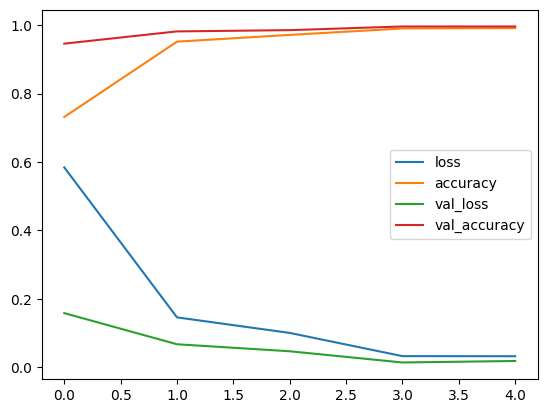

In [ ]:
pd.DataFrame(history2.history).plot()

> both losses and accuraccies should converge independently, if they diverge it means it's an overfit
- Underfit: Low accuraccy & High loss

Preprocesss image into numbers

In [ ]:
def preproc_img(path):
  img = tf.io.read_file(path) #decode_img reads only bin
  img = tf.io.decode_image(img) # Converts image to 3D matrix of numbers
  if img.shape[-1] == 1:
    img = tf.image.grayscale_to_rgb(img) # Convert to RGB cause file is gs but model trained on RGB
  img = tf.image.resize(img, [256, 256])/255. # Resize and rescale
  return img

In [ ]:
import numpy as np

img = preproc_img("./test_data/1000.png")
print(img.shape)
model_output = model2.predict(tf.expand_dims(img, 0))
print(model_output)
np.argmax(model_output)

(256, 256, 3)
1/1 [==============================] - 0s 19ms/step
[[9.9999928e-01 6.8465027e-07 1.3748462e-18 1.8264706e-23]]


0

In [ ]:
print(img.shape)

(256, 256, 1)
